In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
X = iris.data

Y = iris.target

In [5]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [6]:
iris_data = DataFrame(X,columns =['Special Length','Sepal Width','Petal Length','Petal Width'])

In [7]:
iris_target = DataFrame(Y,columns = ['Species'])

In [8]:
def flower(num):
    if num == 0:
        return('Setosa')
    elif num == 1:
        return 'Vericolour'
    elif num == 2:
        return 'Virginica'

In [9]:
iris_target['Species'] = iris_target.Species.apply(flower)

In [10]:
iris_target.tail()

,Species
145,Virginica
146,Virginica
147,Virginica
148,Virginica
149,Virginica


In [11]:
iris = pd.concat([iris_data,iris_target],axis=1)

In [12]:
iris.head()

,Special Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


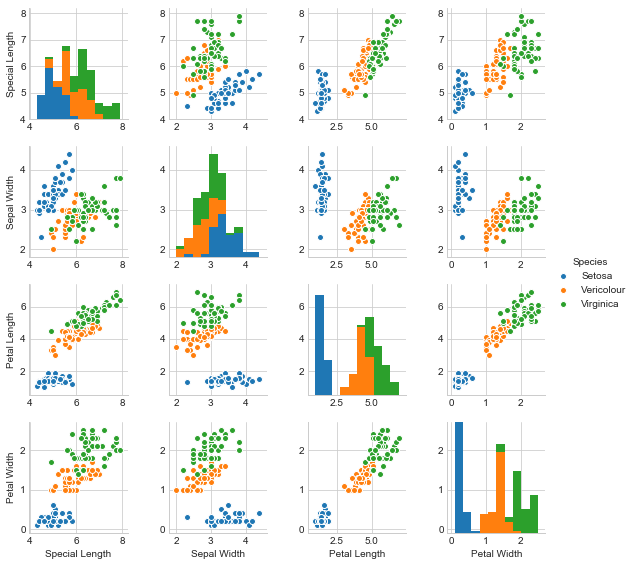

In [13]:
sns.pairplot(iris,hue='Species',size=2)

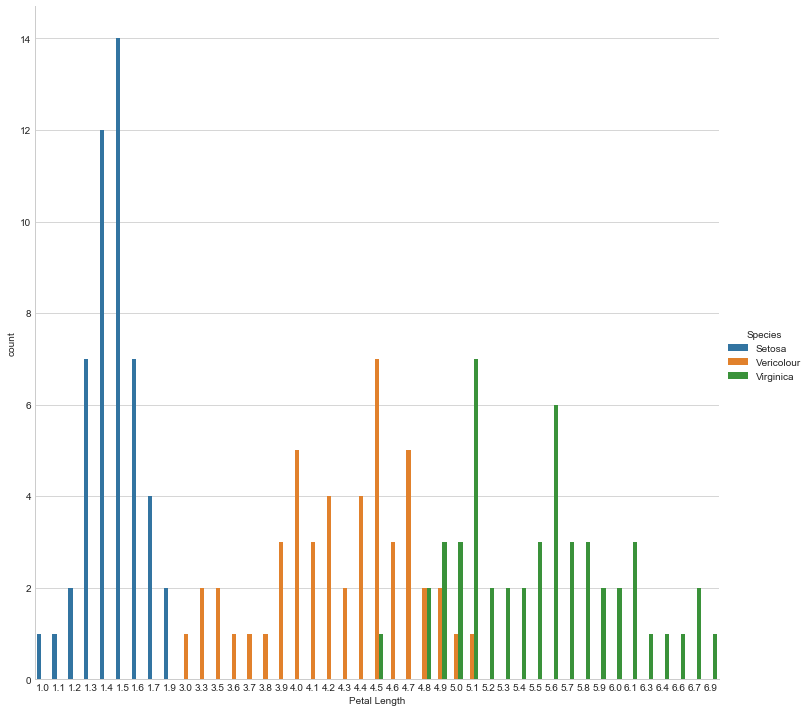

In [14]:
sns.factorplot('Petal Length',data=iris,hue='Species',kind='count',size=10)

In [15]:
#Machine learning import
from sklearn.linear_model import LogisticRegression
#python version before 3.5 
#from sklearn.cross_validation import train_test_split
#python version 3.6
from sklearn.model_selection import train_test_split

In [16]:
logreg = LogisticRegression()

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=3)
#test_size = 0.4 is training data 0.6, test data 0.4 
#default is 0.3

In [17]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
from sklearn import metrics

In [19]:
Y_pred = logreg.predict(X_test)

In [20]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9333333333333333


In [21]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [23]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [24]:
Y_pred = knn.predict(X_test)

In [25]:
metrics.accuracy_score(Y_test,Y_pred)

0.95

In [26]:
knn1 = KNeighborsClassifier(n_neighbors=1)

In [27]:
knn1.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [28]:
Y_pred1 = knn1.predict(X_test)

In [29]:
metrics.accuracy_score(Y_test,Y_pred1)

0.9666666666666667

In [30]:
k_range = range(1,21)

accuracy=[]

for k in k_range:
    knn_try =  KNeighborsClassifier(n_neighbors=k)
    knn_try.fit(X_train,Y_train)
    
    Y_predtry = knn_try.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test,Y_predtry))


Text(0,0.5,'Testing Accuracy')

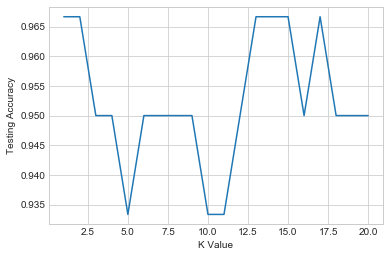

In [31]:
plt.plot(k_range,accuracy)
plt.xlabel('K Value')
plt.ylabel('Testing Accuracy')